In [1]:
# picking out the stocks to be traded
# apply portfolio balancing using Global Efficient Frontier

In [2]:
from empyrial import (
    empyrial,
    Engine,
) # importing empyrial for portfolio analysis, and backtesting
from datetime import (
    datetime,
    timedelta,
) # importing datetime for controlling period of analysis
from pandas_datareader import data as web
import yfinance as yfin
yfin.pdr_override()

/Users/daweili/Desktop/develop/jin-trading/env/lib/python3.9/site-packages/fpdf/__init__.py:39: UserWarning: You have both PyFPDF & fpdf2 installed. Both packages cannot be installed at the same time as they share the same module namespace. To only keep fpdf2, run: pip uninstall --yes pypdf && pip install --upgrade fpdf2
  warnings.warn(


In [3]:
BENCHMARK='SPY' # Using SPY as the benchmark for comparison
BALANCE=10000 # start with a balance of $10,000
PORTFOLIO=[
    'MSFT',
    'NVDA',
    'META',
    'BAC',
    'AXP',
    'MCD',
    'KO',
    'AMZN',
    'WMT',
    'CVX',
    'YUM',
] # my portfolio, consists of tech, finance, retail, oil, and FMCG

# get stock close price for the past 7 days to calculate how many shares to own
PORTFOLIO_DATA=[
    web.DataReader(
        stock,
        start=str(datetime.now()-timedelta(days=7))[:10],
        end=str(datetime.now())[:10]
    ).reset_index()[['Date','Close']] for stock in PORTFOLIO
]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Rebalance schedule: 
      2021-03-17 10:00:00  2021-04-16 20:00:00  2021-05-17 06:00:00  \
MSFT              0.00000              0.06745              0.00742   
NVDA              0.00000              0.01844              0.00000   
META              0.04967              0.12676              0.13518   
BAC               0.20436              0.17731              0.25192   
AXP               0.17799              0.18032              0.19608   
MCD               0.05811              0.09079              0.06378   
KO                0.01317              0.07190              0.07738   
AMZN              0.00000              0.02823              0.00000   
WMT               0.00000              0.00000              0.00000   
CVX               0.42455              0.10472              0.15398   
YUM               0.07215              0.13409              0.11426   

      2021-06-16 16:00:00  2021-07-17 02:00:00  2021-08-16 12:00:00  \
MSFT              0.02599              0.10192         

,Backtest
,
Annual return,56.28%
Cumulative return,258.1%
Annual volatility,20.51 %
Winning day ratio,57.92%
Sharpe ratio,2.28
Calmar ratio,2.63
Information ratio,0.01
Stability,0.94
Max Drawdown,-13.0 %


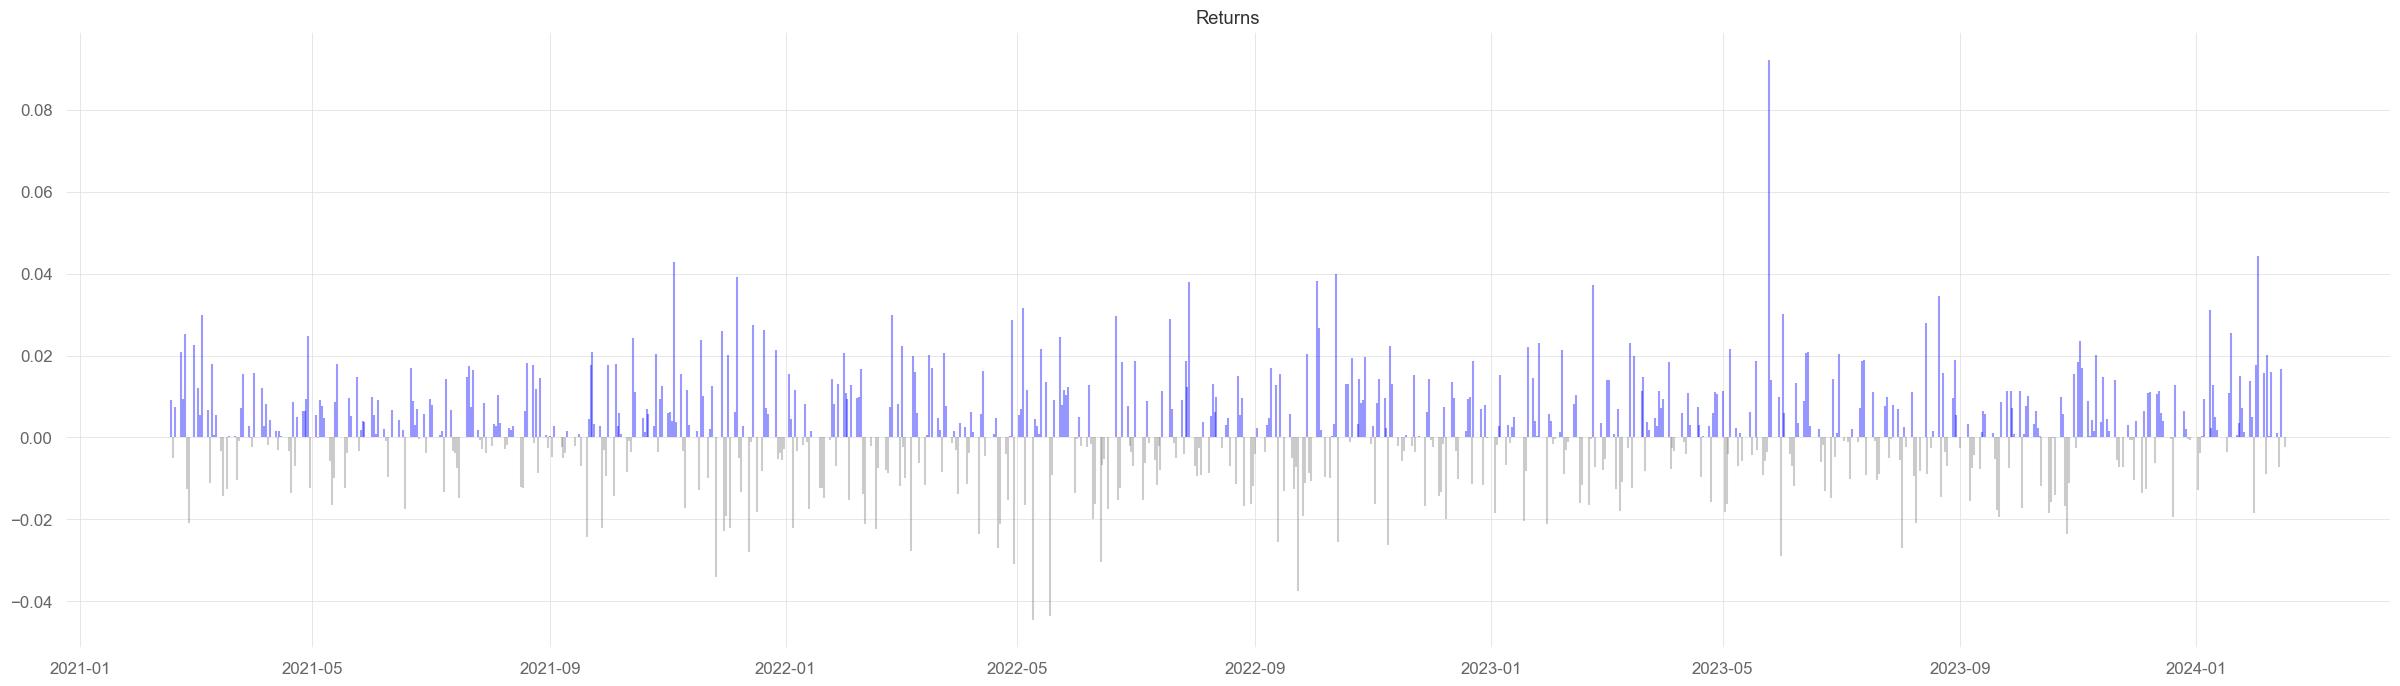

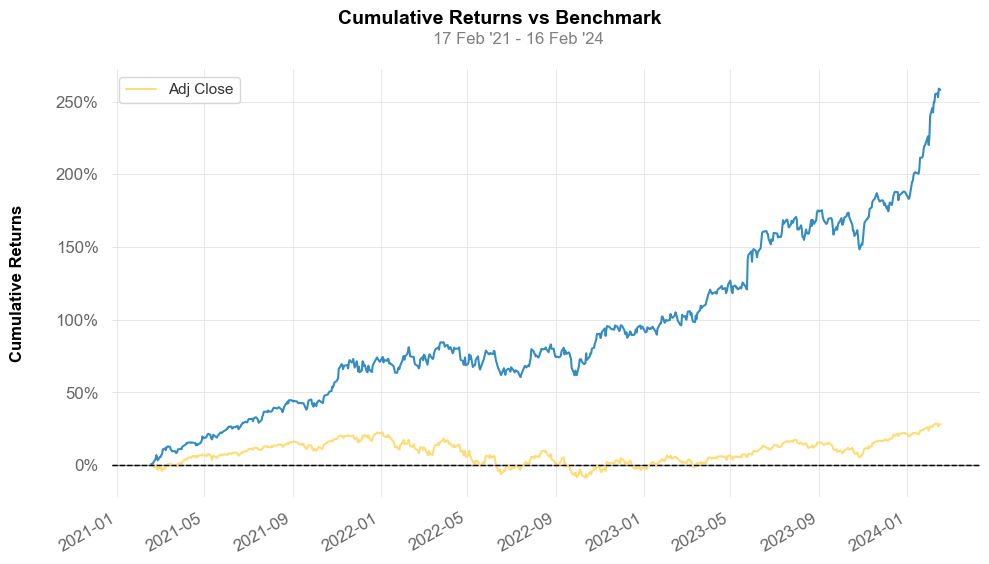

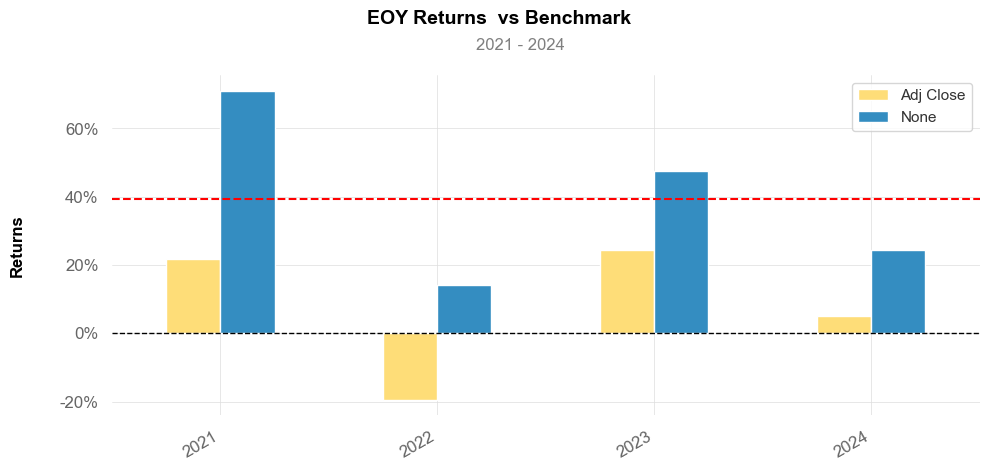

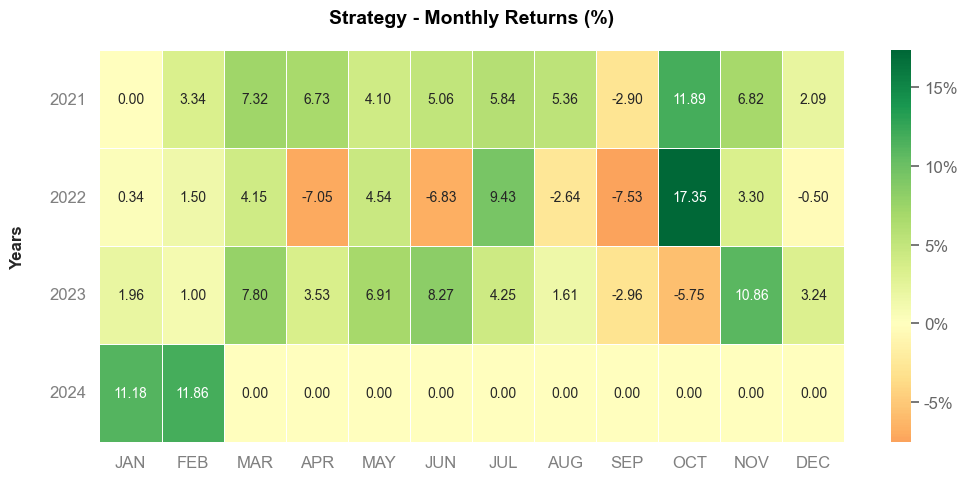

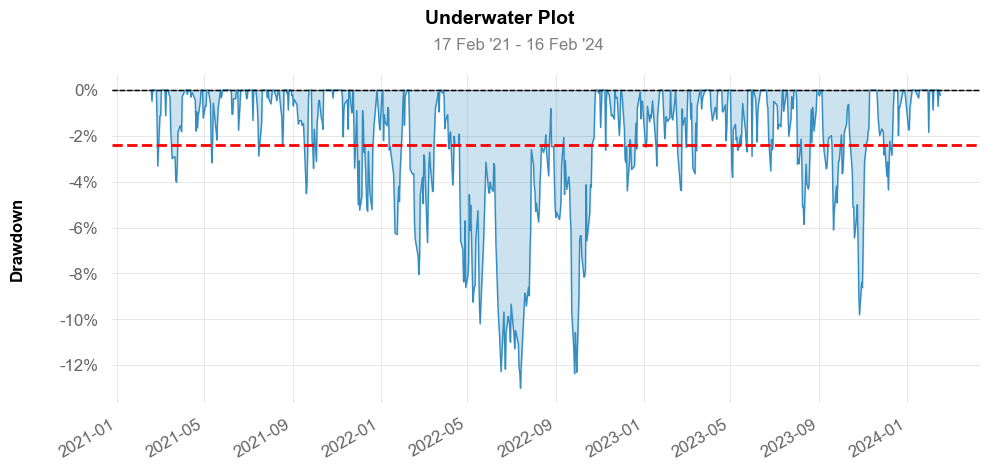

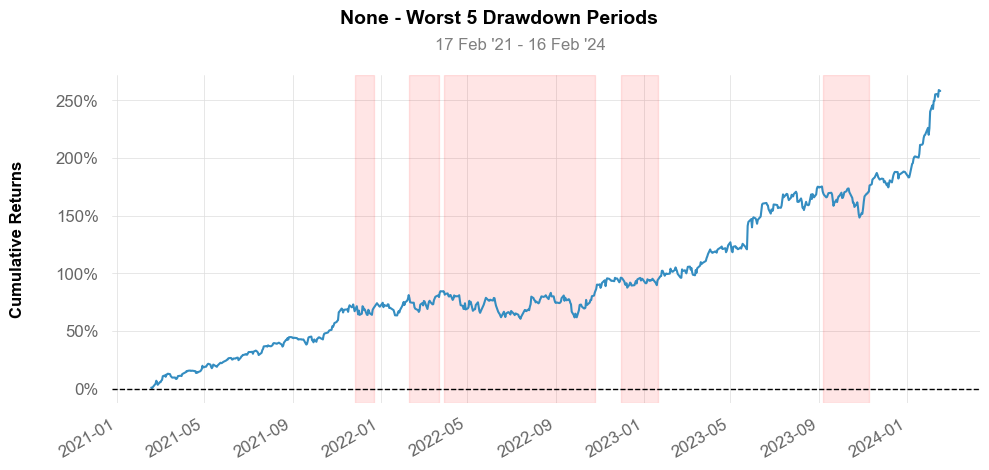

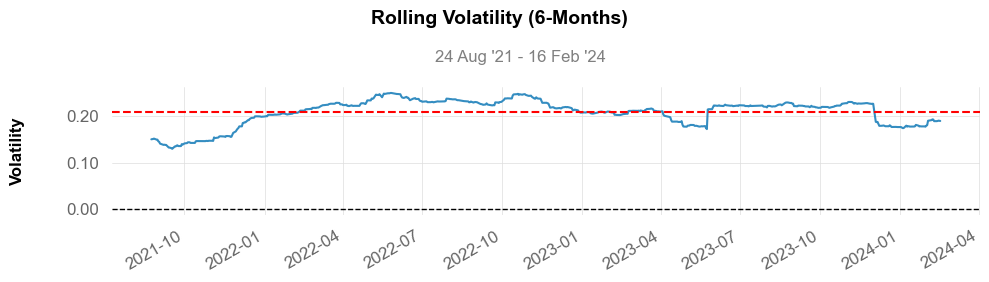

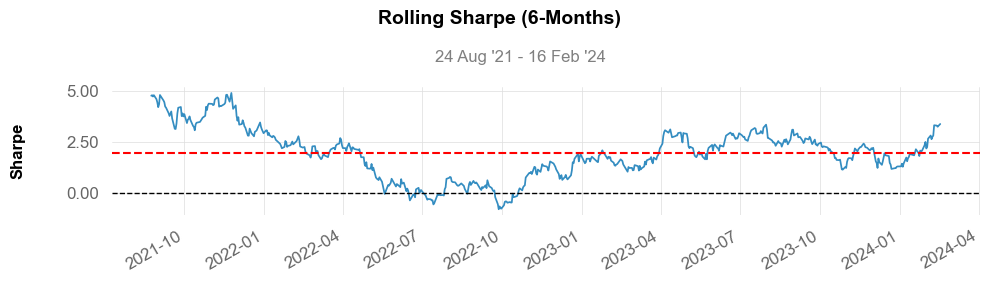

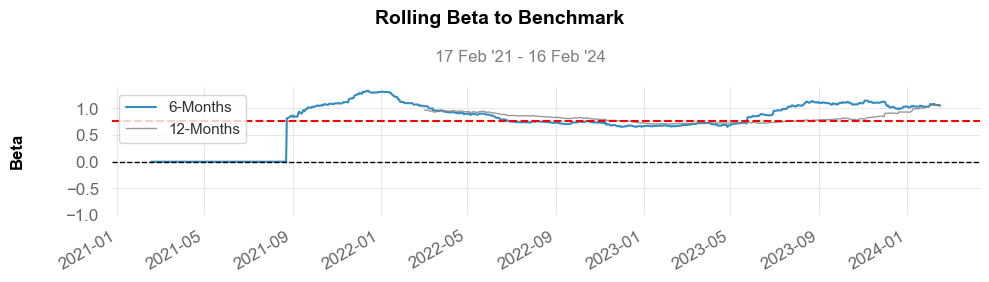

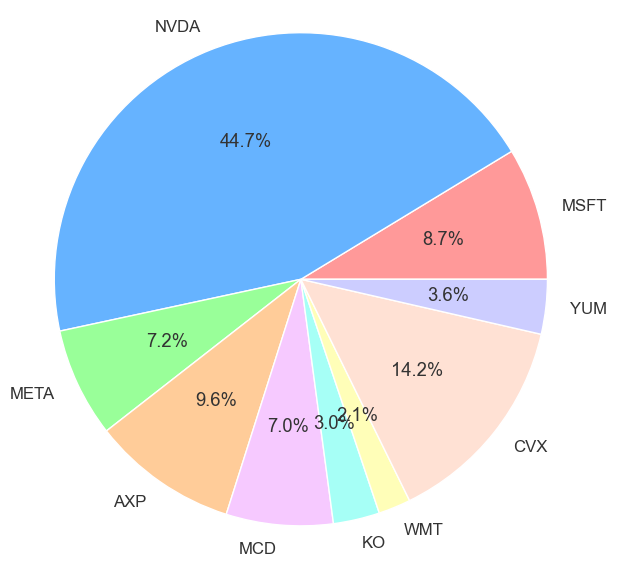

The PDF was generated successfully!
Weights acquired using EF on past 3 years of data: MSFT:0.08685, NVDA:0.44687, META:0.07172, AXP:0.0, MCD:0.09563, KO:0.07006, WMT:0.03039, CVX:0.0, YUM:0.02116


In [4]:
# getting weights using 3 years of data
portfolio=Engine(
    start_date=str(datetime.now()-timedelta(days=3*366))[:10],
    benchmark=[BENCHMARK],
    portfolio=PORTFOLIO,
    optimizer='EF',
    max_weights=0.5,
    risk_manager={
        "Stop Loss":-0.2
    },
    rebalance='monthly',
)
op=empyrial(portfolio, report=True, filename="report.pdf")
print(f"""Weights acquired using EF on past 3 years of data: {
    ', '.join(
        [f'{stock}:{weight}' for stock, weight in zip(PORTFOLIO,portfolio.weights)]
    )
}""")

In [ ]:
import yagmail
import json

# loading secrets
with open('secrets.json') as f:
    secrets=json.load(f)

shares=[
    int(
        (BALANCE * weight) / price_data.iloc[-1,1]
    ) for weight, price_data in zip(
        portfolio.weights,PORTFOLIO_DATA
    )
] # round the purchase to integer shares, since fractional trading is not available on E*Trade

messaging=f'Today is {str(datetime.now())[:10]}.\nOwn '+', '.join([
    f"{share} shares of {stock}" for stock, share in zip(PORTFOLIO,shares) if share > 0
])+f'.\nEstimated annualized return: {empyrial.CAGR}'

# Setup the email client
yag = yagmail.SMTP(secrets['email_addr'], secrets['email_pwd'])
# Email content
contents = [messaging, 'report.pdf']
# Sending the email
yag.send('thomashyde23@gmail.com', f'Portfolio Rebalance @ {str(datetime.now())[:10]}', contents)

In [ ]:
shares=[
    int(
        (BALANCE * weight) / price_data.iloc[-1,1]
    ) for weight, price_data in zip(
        portfolio.weights,PORTFOLIO_DATA
    )
] # round the purchase to integer shares, since fractional trading is not available on E*Trade

In [ ]:
print(f'Today is {str(datetime.now())[:10]}.\nOwn '+', '.join([
    f"{share} shares of {stock}" for stock, share in zip(PORTFOLIO,shares) if share > 0
])+f'.\nEstimated annualized return: {empyrial.CAGR}')

In [ ]:
# Command for running main.py
# python main.py "MSFT,NVDA,META,BAC,AXP,MCD,KO,AMZN,WMT,CVX,YUM" 10000 --benchmark SPY